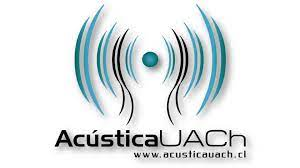
</div>

## Universidad Austral de Chile
## Facultad de ciencias de la ingeniería
## Instituto de acústica<h2><h2>
<h1 style="text-align:center"> <font size=6>Tarea 3: Análisis de Evento Sísmico</font><h1><h1>
<h2 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h2>
<h3 style="text-align:center">17 de junio de 2022</h3>
<h3 style="text-align:left">Integrantes:</h3>
<p style="text-align:left"> Juan José Ardiles<br>
<a href="mailto:juan(dot)ardiles(dot)r(at)gmail(dot)com">juan(dot)ardiles(dot)r(at)gmail(dot)com</a><br>
<p style="text-align:left"> Felipe Riquelme G.<br>
<a href="mailto:felipe(dot)riquelme01(at)alumnos(dot)uach(dot)cl">felipe(dot)riquelme01(at)alumnos(dot)uach(dot)cl</a><br>
<h3 style="text-align:left">Profesor:</h3>
<p style="text-align:left"> Víctor Poblete<br>
<a href="mailto:vpoblete(at)uach(dot)cl">vpoblete(at)uach(dot)cl</a><br>

In [4]:
from obspy import read

### Introducción

A continuación se realizará un proceso de análisis para un evento sísmico, en el cual se detallarán y describirán las características más importantes en este tipo de fenómenos. Para efectos de ejemplificación se utilizará un sismo ocurrido el día 23 de septiembre del año 2018, a las 05:32 hrs, con una magintud de 5.4° Richter. Es importante mencionar también que se utilizará la librería Obspy para la obtención de todos estos datos.

## Lectura Archivo Estación 1

In [9]:
#Stream es un archivo que contiene variada información de un evento
#Incluímos las 3 mediciones, o trazas, en un único objeto stream para mayor comodidad al manipular los datos
st_co02=read('Evento Sismico\CO02\CO02_HHE.SAC')
st_co02+=read('Evento Sismico\CO02\CO02_HHN.SAC')
st_co02+=read('Evento Sismico\CO02\CO02_HHZ.SAC')
print(st_co02)

3 Trace(s) in Stream:
C1.CO02..HHE | 2018-09-23T05:33:31.000000Z - 2018-09-23T05:41:51.000000Z | 100.0 Hz, 50001 samples
C1.CO02..HHN | 2018-09-23T05:33:31.000000Z - 2018-09-23T05:41:50.990000Z | 100.0 Hz, 50000 samples
C1.CO02..HHZ | 2018-09-23T05:33:31.000001Z - 2018-09-23T05:41:51.000001Z | 100.0 Hz, 50001 samples


## Lectura Archivo Estación 2

In [10]:
st_go01=read('Evento Sismico\GO01\GO01_BHE.SAC')
st_go01+=read('Evento Sismico\GO01\GO01_BHN.SAC')
st_go01+=read('Evento Sismico\GO01\GO01_BHZ.SAC')
print(st_go01)

3 Trace(s) in Stream:
C.GO01..BHE | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples
C.GO01..BHN | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples
C.GO01..BHZ | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples


## Lectura Archivo Estación 3

In [11]:
st_go03=read('Evento Sismico\GO03\GO03_BHE.SAC')
st_go03+=read('Evento Sismico\GO03\GO03_BHN.SAC')
st_go03+=read('Evento Sismico\GO03\GO03_BHZ.SAC')
print(st_go03)

3 Trace(s) in Stream:
C.GO03..BHE | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHN | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHZ | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples


## Lectura Archivo Estación 4

In [12]:
st_pb09=read('Evento Sismico\PB09\PB09_HHE.SAC')
st_pb09+=read('Evento Sismico\PB09\PB09_HHN.SAC')
st_pb09+=read('Evento Sismico\PB09\PB09_HHZ.SAC')
print(st_go03)

3 Trace(s) in Stream:
C.GO03..BHE | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHN | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHZ | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples


In [23]:
st_pb09[2].stats.sac.evdp

59.3

[974. 976. 978. ... 431. 430. 495.]
         network: C
         station: GO01
        location: 
         channel: BHZ
       starttime: 2018-09-23T05:33:11.000000Z
         endtime: 2018-09-23T05:40:51.000000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 18401
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -72193.0, 'depmax': 110186.0, 'scale': 1.0, 'b': 0.0, 'e': 460.0, 'evla': -24.3503, 'evlo': -70.0323, 'evdp': 59.3, 'mag': 5.4, 'user0': 529.3622, 'user1': 0.0, 'dist': 525.5869, 'depmen': 508.47134, 'nzyear': 2018, 'nzjday': 266, 'nzhour': 5, 'nzmin': 33, 'nzsec': 11, 'nzmsec': 0, 'nvhdr': 6, 'npts': 18401, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'GO01', 'kuser0': 'Mww', 'kcmpnm': 'BHZ', 'knetwk': 'C'})


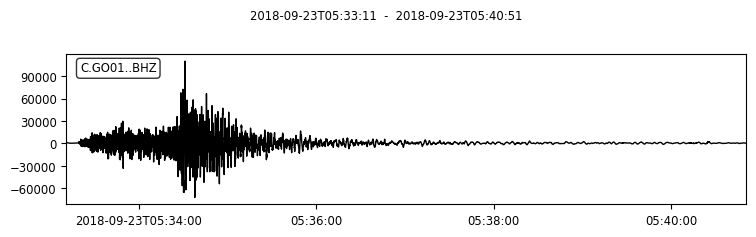

In [43]:
#Obtenemos la información que hay en la única traza que hay en el stream, posición 0
tr=st_go01[2]
#Ahora con la función data se obtiene la información en forma de un array numpy
data=tr.data
print(data)
#con la función stats se obtiene toda la metadata de la traza
print(tr.stats)
#Ahora se puede plotear la información con la siguiente linea
tr.plot();

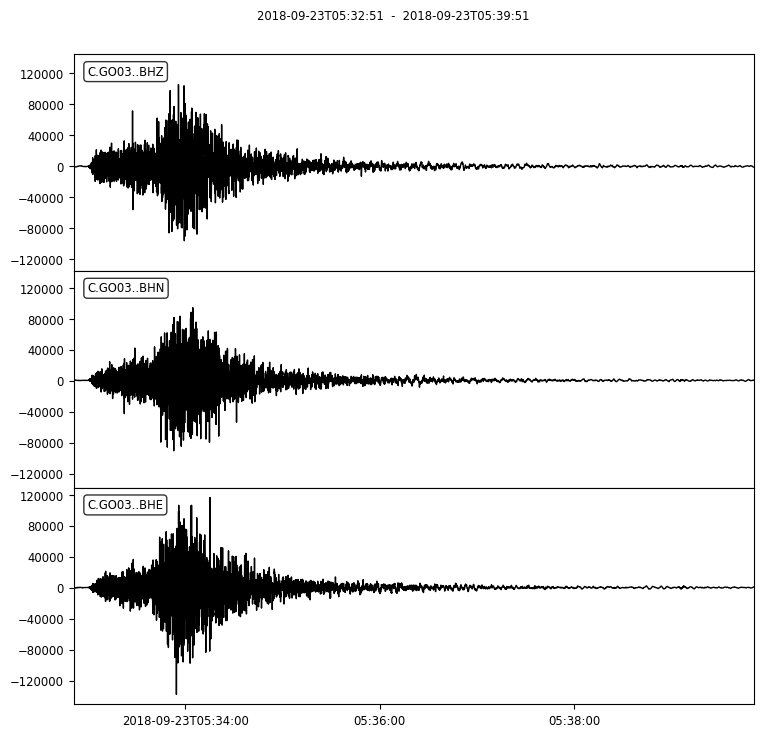

In [14]:
st_go03.plot();

In [15]:
st_go01[2].stats.sac

AttribDict({'delta': 0.025, 'depmin': -72193.0, 'depmax': 110186.0, 'scale': 1.0, 'b': 0.0, 'e': 460.0, 'evla': -24.3503, 'evlo': -70.0323, 'evdp': 59.3, 'mag': 5.4, 'user0': 529.3622, 'user1': 0.0, 'dist': 525.5869, 'depmen': 508.47134, 'nzyear': 2018, 'nzjday': 266, 'nzhour': 5, 'nzmin': 33, 'nzsec': 11, 'nzmsec': 0, 'nvhdr': 6, 'npts': 18401, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'GO01', 'kuser0': 'Mww', 'kcmpnm': 'BHZ', 'knetwk': 'C'})

# Datos importantes

Mencionar base de datos (Network)
Mencionar las estaciones de medicion
Frecuencia de sampleo Cantidad de muestras
Fechas de inicio y termino de mediciones
Magnitud del evento
Ubicación del evento (latitud,longitud, profundidad) Distancia entre estacion y evento(dist)
Profundidades mínimas y máximas


Network
C1= Red Sismológica nacional(82)
CX= IPOC seismic network(Integrated plate boundary observatory chile) (22)
C= Chilean National Sesimic Network (20)

Nombres estaciones

CO02=Combarbalá     source= IRISDMC 
GO01=Chusmiza, Chile
GO03=Copiapó (Tierra Amarilla), Chile
PB09=IPOC Station Quillagua, Chile  source=GEOFON


In [16]:
print(st_co02[2].stats.sac.evla) 
print(st_go01[2].stats.sac.evla) 
print(st_go03[2].stats.sac.evla) 
print(st_pb09[2].stats.sac.evla)

-24.3503
-24.3503
-24.3503
-24.3503


In [56]:
d = { 'CO02': [st_co02[2].stats.sac.evla, st_co02[2].stats.sac.evlo, st_co02[2].stats.sac.evdp, st_co02[2].stats.sac.dist, -173.1, st_co02[2].stats.sac.mag],
'GO01': [st_go01[2].stats.sac.evla, st_go01[2].stats.sac.evlo, st_go01[2].stats.sac.evdp, st_go01[2].stats.sac.dist, 9.58, st_go01[2].stats.sac.mag],
'GO03': [st_go03[2].stats.sac.evla, st_go03[2].stats.sac.evlo, st_go03[2].stats.sac.evdp, st_go03[2].stats.sac.dist,-176.83, st_go03[2].stats.sac.mag],
'PB09': [st_pb09[2].stats.sac.evla, st_pb09[2].stats.sac.evlo, st_pb09[2].stats.sac.evdp, st_pb09[2].stats.sac.dist, 16.05, st_pb09[2].stats.sac.mag]
}
print ("{:<9} {:<18} {:<20} {:<18} {:<20} {:<10} {:<10}".format('Estación','    Latitud [°]','   Longitud [°]','Profundidad [km]',' Distancia [km]', 'Azimuth [°]', 'Magnitud Mww'))
for Est, v in d.items():
 Lat, Lon, Pro, Dis, Azi, Mag = v
 print ("{:<9} {:<18} {:<20} {:<18} {:<20} {:<10} {:<10}".format(Est, Lat, Lon, Pro, Dis, Azi, Mag))

Estación      Latitud [°]       Longitud [°]      Profundidad [km]    Distancia [km]      Azimuth [°] Magnitud Mww
CO02      -24.350299835205078 -70.03230285644531   59.29999923706055  765.4271240234375    -173.1     5.400000095367432
GO01      -24.350299835205078 -70.03230285644531   59.29999923706055  525.5869140625       9.58       5.400000095367432
GO03      -24.350299835205078 -70.03230285644531   59.29999923706055  359.89990234375      -176.83    5.400000095367432
PB09      -24.350299835205078 -70.03230285644531   59.29999923706055  294.1982116699219    16.05      5.400000095367432


Como podemos apreciar en la tabla anterior, donde se muestran las coordenadas del evento sísmico entregadas por las estaciones correspondientes, todas estas estaciones nos entregan las mismas, además observamos el valor de Azimuth para cada estación, que es el ángulo del arco en grados formado desde el epicentro a la estación, siendo 0° el norte, 90° el este y -90° el oeste. Estos valores se obtienen al triangular la ubicación del evento, usando la diferencia de tiempo de arribo de las ondas P y S, la cuál se incrementa a medida que las estaciones se alejan de la fuente.


En la siguiente imagen, se aprecian las estaciones y sus distancias al epicentro, unidos con una recta con la cuál, al compararla con una recta trazada de norte a sur que pasa por el epicentro, se puede apreciar el azimuth expresado en la tabla anterior:

<img src="Estaciones.JPG">



Además, en el gráfico a continuación se puede apreciar la diferencia de llegada de las ondas P y S para cada estación, donde la demora es proporcional a la distancia de la estación al epicentro del evento sísmico, como se explica en el párrafo anterior.

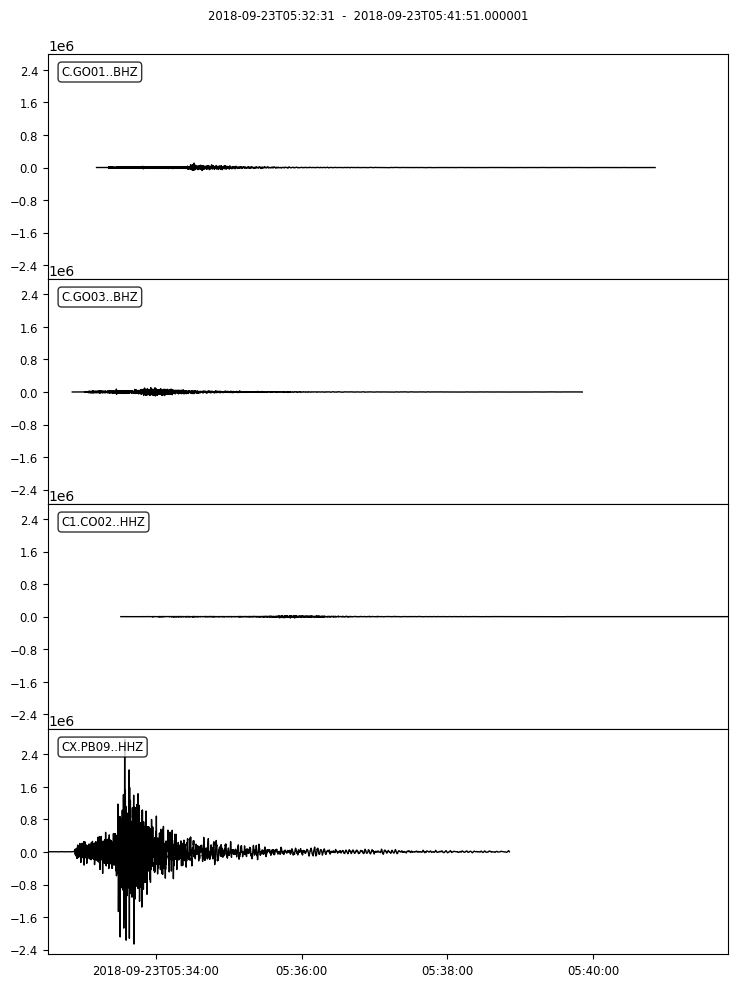

In [46]:
st_Z=read('Evento Sismico\CO02\CO02_HHZ.SAC')
st_Z+=read('Evento Sismico\GO01\GO01_BHZ.SAC')
st_Z+=read('Evento Sismico\GO03\GO03_BHZ.SAC')
st_Z+=read('Evento Sismico\PB09\PB09_HHZ.SAC')
st_Z.plot();

Por último, en la tabla podemos apreciar que la Magnitud exhibida por todas las estaciones es la misma, de 5.4 Mww. Esta escala logarítmica Mww se define como una escala de magnitud de momento, y su principal característica es que no existe una saturación cuando los valores son muy altos, es decir, que no importa que tan altos sean los valores de magnitud, estos son diferenciables unos de los otros, a diferencia de las escalas del mismo tipo llamadas ML, M8 y mb.$^{(1)}$

Además, por la profundidad del hipocentro del sismo (59,29 km) y su ubicación en la superficie (epicentro), se puede descartar que se trate de un sismo Outer-Rise, los que ocurren a profundidades menores a 30 km. y costa afuera de la fosa oceánica. También descartamos que se trate de un sismo por falla transformante, producidos por el desplazamiento lateral de una placa respecto de otra vecina, los que en Chile se dan en su mayoría en la zona extremo sur, entre las placas Scotia y Sudamericana$^{(2)}$.

Ciertamente estamos en presencia de un sismo Tectónico, que predominan en nuestro país, ya que no hay presencia de actividad volcánica en el sector del evento avistado para clasificarlo como Sismo Volcánico, ni tampoco como Sismo de Colapso, que se deben a derrumbamientos de cavernas o minas, los que son superficiales y de magnitud baja.$^{(3)}$

En cuanto a su profundidad, está en el límite para ser considerado supercial o cortical (de profundidad menor a los 60 km.), mientras que además podríamos clasificarlo de un sismo interplaca o de subducción, al estar en las proximidades de la zona de acoplamiento entre las placas de Nazca y la Sudamericana, y los cuales van entre los 40 y 60 km. de profundidad máxima, por lo que el sismo analizado estaría dentro del rango de esta clasificación, también casi al límite.$^{(1)}$



### Bibliografía

(1) Hanks, Thomas C.; Kanamori, Hiroo (1979) 'A Moment Magnitud Scale' Journal of Geophysical Research 
(2) 'Tipos de Sismos en Chile' CSN (Centro Sismológico Nacional) https://www.csn.uchile.cl/tipos-de-sismos-chile/
(3) 'Tipos de Sismos' IGC-Universidad de Panamá https://web.archive.org/web/20190710205019/http://www.panamaigc-up.com/tipos-de-sismos/